In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**Data integration or Data consolidation**


In [ ]:
df1 = pd.read_csv("Sleep_Efficiency.csv")
df2= pd.read_csv("Dataset1.csv")

In [ ]:
#Renaming the column name so Inner Join could be performed
df2 = df2.rename(columns={'Person ID': 'ID'})

**Performing Pandas Equi-Join on ID column**





In [ ]:
# Perform an equi-join on the 'ID' column.
# Inner join will keep only the rows with matching 'ID' values in both DataFrames.
merged_df = pd.merge(df1, df2, on='ID', how='inner')

In [ ]:
merged_df.head()

In [ ]:
merged_df.shape

(374, 25)

In [ ]:
#Uploading the dataset file after saving the merged file
from google.colab import files
uploaded = files.upload()

Saving final dataset1.csv to final dataset1 (2).csv


In [ ]:
df= pd.read_csv("sleep_data.csv")

**Data Processing or Data Cleaning**

In [ ]:
df.describe()

,ID,Age,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,40.139037,0.791390,22.500000,53.403743,24.096257,1.609626,24.131016,1.056150,1.772727,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,13.100843,0.135305,3.487819,15.346231,14.944090,1.323134,30.206731,1.585643,1.413912,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,9.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,29.000000,0.710000,20.000000,53.500000,15.000000,1.000000,0.000000,0.000000,0.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,40.000000,0.825000,22.000000,59.000000,18.000000,1.000000,25.000000,0.000000,2.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,51.000000,0.900000,25.000000,65.000000,21.000000,3.000000,50.000000,2.000000,3.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,69.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
print('Unique Values of Occupation are', df['Occupation'].unique())

print('\nUnique Values of BMI Category are', df['BMI Category'].unique())

print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique Values of Sleep Disorder are ['None' 'Sleep Apnea' 'Insomnia' 'Cataplexy' 'Sleep Paralysis']


In [ ]:
df.shape

(374, 24)

In [ ]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                 0
Caffeine consumption       0
Alcohol consumption        0
Smoking status             0
Exercise frequency         0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

**Applying Data Imputations for the null values in dataset.**

*Data imputation is the process of filling in missing or incomplete data in a dataset with estimated or substituted values.(Mean, Median or Mode)*

In [ ]:
#It is seen that awakenings, caffeine consumption, alcohol consumption and exercise frequency have null values.
df_filled = df.fillna(df.median())

In [ ]:
df_filled.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                 0
Caffeine consumption       0
Alcohol consumption        0
Smoking status             0
Exercise frequency         0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Gender                   374 non-null    object 
 3   Bedtime                  374 non-null    object 
 4   Wakeup time              374 non-null    object 
 5   Sleep efficiency         374 non-null    float64
 6   REM sleep percentage     374 non-null    int64  
 7   Deep sleep percentage    374 non-null    int64  
 8   Light sleep percentage   374 non-null    int64  
 9   Awakenings               374 non-null    int64  
 10  Caffeine consumption     374 non-null    int64  
 11  Alcohol consumption      374 non-null    int64  
 12  Smoking status           374 non-null    object 
 13  Exercise frequency       374 non-null    int64  
 14  Occupation               3

In [ ]:
#Dropping ID column as its no longer required
df_filled = df_filled.drop('ID', axis=1)

In [ ]:
df_filled.head()

,Age,Gender,Bedtime,Wakeup time,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,...,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,65,Female,06/03/2021 1:00,06/03/2021 7:00,0.88,18,70,12,0,0,...,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,69,Male,05/12/2021 2:00,05/12/2021 9:00,0.66,19,28,53,3,0,...,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,40,Female,25/05/2021 21:30,25/05/2021 5:30,0.89,20,70,10,1,0,...,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,40,Female,03/11/2021 2:30,03/11/2021 8:30,0.51,23,25,52,3,50,...,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,57,Male,13/03/2021 1:00,13/03/2021 9:00,0.76,27,55,18,3,0,...,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Extracting Date and Time from Bedtime and Wakeup Column
#Converting the 'Bedtime' column to a datetime object
df_filled['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%d/%m/%Y %H:%M')

# Extract time into a new column
df_filled['Sleep_Time'] = df_filled['Bedtime'].dt.time
df_filled.insert(df_filled.columns.get_loc("Bedtime") + 1, "Sleep_Time", df_filled.pop("Sleep_Time"))

#Converting the 'Wakeup' column to a datetime object
df_filled['Wakeup time'] = pd.to_datetime(df['Wakeup time'], format='%d/%m/%Y %H:%M')

# Extract time into a new column
df_filled['Wakeup_Time'] = df_filled['Wakeup time'].dt.time
df_filled.insert(df_filled.columns.get_loc("Wakeup time") + 1, "Wakeup_time", df_filled.pop("Wakeup_Time"))

In [ ]:
df_filled.head()

,Age,Gender,Bedtime,Sleep_Time,Wakeup time,Wakeup_time,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,...,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,65,Female,2021-03-06 01:00:00,01:00:00,2021-03-06 07:00:00,07:00:00,0.88,18,70,12,...,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,69,Male,2021-12-05 02:00:00,02:00:00,2021-12-05 09:00:00,09:00:00,0.66,19,28,53,...,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,40,Female,2021-05-25 21:30:00,21:30:00,2021-05-25 05:30:00,05:30:00,0.89,20,70,10,...,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,40,Female,2021-11-03 02:30:00,02:30:00,2021-11-03 08:30:00,08:30:00,0.51,23,25,52,...,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,57,Male,2021-03-13 01:00:00,01:00:00,2021-03-13 09:00:00,09:00:00,0.76,27,55,18,...,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Dropping Bedtime and Wakeup time as the dates aren't of much importance
df_filled.pop('Bedtime')
df_filled.pop('Wakeup time')

0     2021-03-06 07:00:00
1     2021-12-05 09:00:00
2     2021-05-25 05:30:00
3     2021-11-03 08:30:00
4     2021-03-13 09:00:00
              ...        
369   2021-05-08 07:30:00
370   2021-09-21 05:00:00
371   2021-02-21 09:30:00
372   2021-02-24 06:00:00
373   2021-10-11 07:00:00
Name: Wakeup time, Length: 374, dtype: datetime64[ns]

In [ ]:
df_filled.head()

,Age,Gender,Sleep_Time,Wakeup_time,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,...,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,65,Female,01:00:00,07:00:00,0.88,18,70,12,0,0,...,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,69,Male,02:00:00,09:00:00,0.66,19,28,53,3,0,...,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,40,Female,21:30:00,05:30:00,0.89,20,70,10,1,0,...,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,40,Female,02:30:00,08:30:00,0.51,23,25,52,3,50,...,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,57,Male,01:00:00,09:00:00,0.76,27,55,18,3,0,...,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
Categorical_Col = []
Numerical_Col = []
for col in df_filled.columns:
    if df_filled[col].dtype == 'object':
        Categorical_Col.append(col)

    else:
        Numerical_Col.append(col)

In [ ]:
Numerical_Col

['Age',
 'Sleep efficiency',
 'REM sleep percentage',
 'Deep sleep percentage',
 'Light sleep percentage',
 'Awakenings',
 'Caffeine consumption',
 'Alcohol consumption',
 'Exercise frequency',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

In [ ]:
Categorical_Col

['Gender',
 'Sleep_Time',
 'Wakeup_time',
 'Smoking status',
 'Occupation',
 'BMI Category',
 'Blood Pressure',
 'Sleep Disorder']

**Outlier Detection and Removal**
 *(Only for Numerical Values).
Writing a code that detects only those columns that have a numerical value and starts outlier detection.*

In [ ]:
from scipy import stats
df = pd.DataFrame(df_filled)

# Defining a threshold for outliers
threshold = 4

# Create an empty DataFrame to store outlier rows
outliers = pd.DataFrame()

# Loop through columns and identify outliers for numerical columns
for column in df.columns:
    if df[column].dtype in [int, float]:
        z_scores = stats.zscore(df[column])
        column_outliers = df[abs(z_scores) > threshold]
        outliers = pd.concat([outliers, column_outliers])

# Removing duplicate rows (if any)
outliers = outliers.drop_duplicates()

# Print the rows containing outliers
print("Outliers:")
print(outliers)

# Remove outliers from the main dataset and create a new DataFrame
filtered_df = df[~df.index.isin(outliers.index)]

Outliers:
     Age Gender Sleep_Time Wakeup_time  Sleep efficiency  \
62    29   Male   21:00:00    05:00:00              0.81   
81    29   Male   21:00:00    04:30:00              0.81   
96    41   Male   21:00:00    04:00:00              0.96   
161   42   Male   21:00:00    04:30:00              0.95   

     REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
62                     15                     67                      18   
81                     15                     67                      18   
96                     28                     55                      17   
161                    28                     55                      17   

     Awakenings  Caffeine consumption  ...  Occupation Sleep Duration  \
62            1                   200  ...      Doctor            6.2   
81            2                   200  ...   Scientist            5.8   
96            0                   200  ...  Accountant            7.2   
161           0 

In [ ]:
# Print the updated main dataset without outliers
filtered_df.shape

(370, 23)

**ONE_HOT ENCODING**

In [ ]:
# Apply One-hot encoding for BMI category
filtered_df = pd.get_dummies(filtered_df, columns=['BMI Category'], prefix='BMI_Category')


**LABEL ENCODING**

Keeping the Target variable in the last column and creating a separate dataframe to include all other columns except "Sleep Disorder"

In [ ]:
#Label Encoding for OCCUPATION, Gender and Smoking Status
filtered_df['Occupation'] = filtered_df['Occupation'].astype('category').cat.codes
filtered_df['Gender'] = filtered_df['Gender'].replace({'Male': 0, 'Female': 1})
filtered_df['Smoking status'] = filtered_df['Smoking status'].replace({'Yes': 1, 'No': 0})

In [ ]:
pd.set_option('display.max_columns', None) #To View all columns using head() fxn

In [ ]:
filtered_df.head()

,Age,Gender,Sleep_Time,Wakeup_time,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category_Normal,BMI_Category_Normal Weight,BMI_Category_Obese,BMI_Category_Overweight
0,65,1,01:00:00,07:00:00,0.88,18,70,12,0,0,0,1,3,9,6.1,6,42,6,126/83,77,4200,None,0,0,0,1
1,69,0,02:00:00,09:00:00,0.66,19,28,53,3,0,3,1,3,1,6.2,6,60,8,125/80,75,10000,None,1,0,0,0
2,40,1,21:30:00,05:30:00,0.89,20,70,10,1,0,0,0,3,1,6.2,6,60,8,125/80,75,10000,None,1,0,0,0
3,40,1,02:30:00,08:30:00,0.51,23,25,52,3,50,5,1,1,6,5.9,4,30,8,140/90,85,3000,Sleep Apnea,0,0,1,0
4,57,0,01:00:00,09:00:00,0.76,27,55,18,3,0,3,0,3,6,5.9,4,30,8,140/90,85,3000,Sleep Apnea,0,0,1,0


In [ ]:
filtered_df.pop("Wakeup_time")
filtered_df.pop("Sleep_Time")

0      01:00:00
1      02:00:00
2      21:30:00
3      02:30:00
4      01:00:00
         ...   
369    01:30:00
370    22:00:00
371    02:30:00
372    22:00:00
373    23:00:00
Name: Sleep_Time, Length: 370, dtype: object

In [ ]:
import pandas as pd

# Split the "Blood Pressure" column into "Systolic" and "Diastolic" columns
filtered_df[['Systolic BP', 'Diastolic BP']] = filtered_df['Blood Pressure'].str.split('/', expand=True)


# Convert the new columns to numeric if needed
filtered_df['Systolic BP'] = pd.to_numeric(filtered_df['Systolic BP'])
filtered_df['Diastolic BP'] = pd.to_numeric(filtered_df['Diastolic BP'])

# The DataFrame now contains separate columns for systolic and diastolic values
print(filtered_df)


     Age  Gender  Sleep efficiency  REM sleep percentage  \
0     65       1              0.88                    18   
1     69       0              0.66                    19   
2     40       1              0.89                    20   
3     40       1              0.51                    23   
4     57       0              0.76                    27   
..   ...     ...               ...                   ...   
369   41       0              0.72                    20   
370   40       1              0.87                    20   
371   32       1              0.53                    20   
372   29       1              0.72                    25   
373   39       0              0.87                    20   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
0                       70                      12           0   
1                       28                      53           3   
2                       70                      10           1   
3              

In [ ]:
# Remove the original "Blood Pressure" column
filtered_df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
filtered_df.head()

,Age,Gender,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category_Normal,BMI_Category_Normal Weight,BMI_Category_Obese,BMI_Category_Overweight,Systolic BP,Diastolic BP
0,65,1,0.88,18,70,12,0,0,0,1,3,9,6.1,6,42,6,77,4200,None,0,0,0,1,126,83
1,69,0,0.66,19,28,53,3,0,3,1,3,1,6.2,6,60,8,75,10000,None,1,0,0,0,125,80
2,40,1,0.89,20,70,10,1,0,0,0,3,1,6.2,6,60,8,75,10000,None,1,0,0,0,125,80
3,40,1,0.51,23,25,52,3,50,5,1,1,6,5.9,4,30,8,85,3000,Sleep Apnea,0,0,1,0,140,90
4,57,0,0.76,27,55,18,3,0,3,0,3,6,5.9,4,30,8,85,3000,Sleep Apnea,0,0,1,0,140,90


**Random Forest Feature Selection**

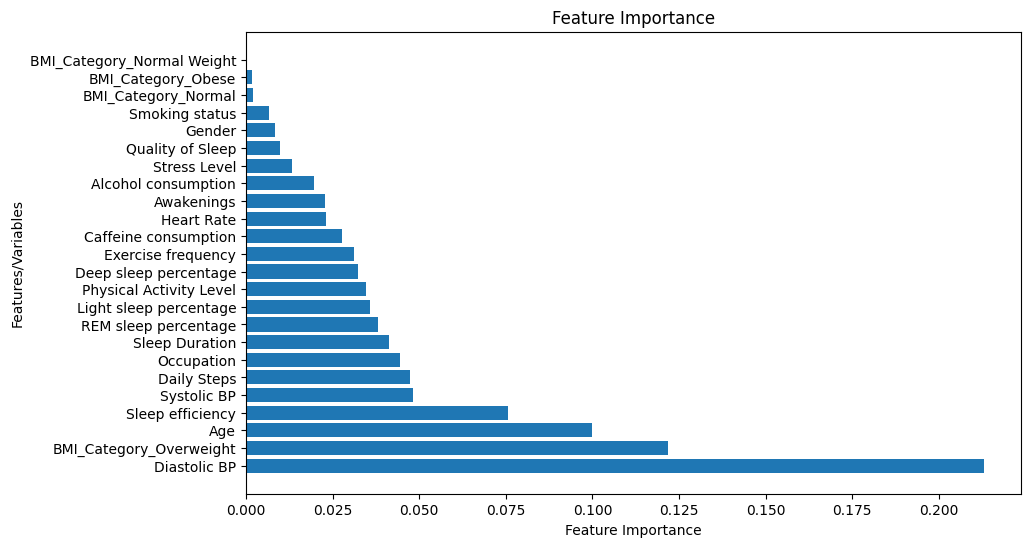

Selected Features:
23               Diastolic BP
21    BMI_Category_Overweight
0                         Age
2            Sleep efficiency
22                Systolic BP
17                Daily Steps
11                 Occupation
12             Sleep Duration
3        REM sleep percentage
5      Light sleep percentage
14    Physical Activity Level
4       Deep sleep percentage
Name: Feature, dtype: object


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

target_column_name = 'Sleep Disorder'
# Separate features and target
X = filtered_df.drop(columns=[target_column_name])  # Features (all columns except the target)
y = filtered_df[target_column_name]
y_encoded = label_encoder.fit_transform(y)

# Initialize a Random Forest model
rf = RandomForestRegressor()
# Fit the model to your data
rf.fit(X, y_encoded)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features/Variables')
plt.title('Feature Importance')
plt.show()

# Select the top K features (e.g., top 5)
top_k_features = feature_importance_df.head(12)['Feature']

# Print the selected features
print("Selected Features:")
print(top_k_features)



In summary, a MSE of 0.19409333381779276 indicates that, on average, your model's predictions are relatively close to the actual target values.

In [ ]:
# Access the sorted feature importance DataFrame
print("Feature Importance for Each Variable:")
print(feature_importance_df)

Feature Importance for Each Variable:
                       Feature  Importance
23                Diastolic BP    0.216035
21     BMI_Category_Overweight    0.120591
0                          Age    0.096647
22                 Systolic BP    0.074535
2             Sleep efficiency    0.065351
17                 Daily Steps    0.049686
11                  Occupation    0.044439
12              Sleep Duration    0.040516
5       Light sleep percentage    0.037053
3         REM sleep percentage    0.034584
4        Deep sleep percentage    0.029157
10          Exercise frequency    0.027043
6                   Awakenings    0.026066
16                  Heart Rate    0.024300
7         Caffeine consumption    0.024189
14     Physical Activity Level    0.023209
8          Alcohol consumption    0.022534
15                Stress Level    0.013894
13            Quality of Sleep    0.010183
1                       Gender    0.008594
9               Smoking status    0.006791
20          BMI_

**RANDOM FOREST FEATURE IMPORTANCE WITH SHAP**

In [ ]:
pip install shap

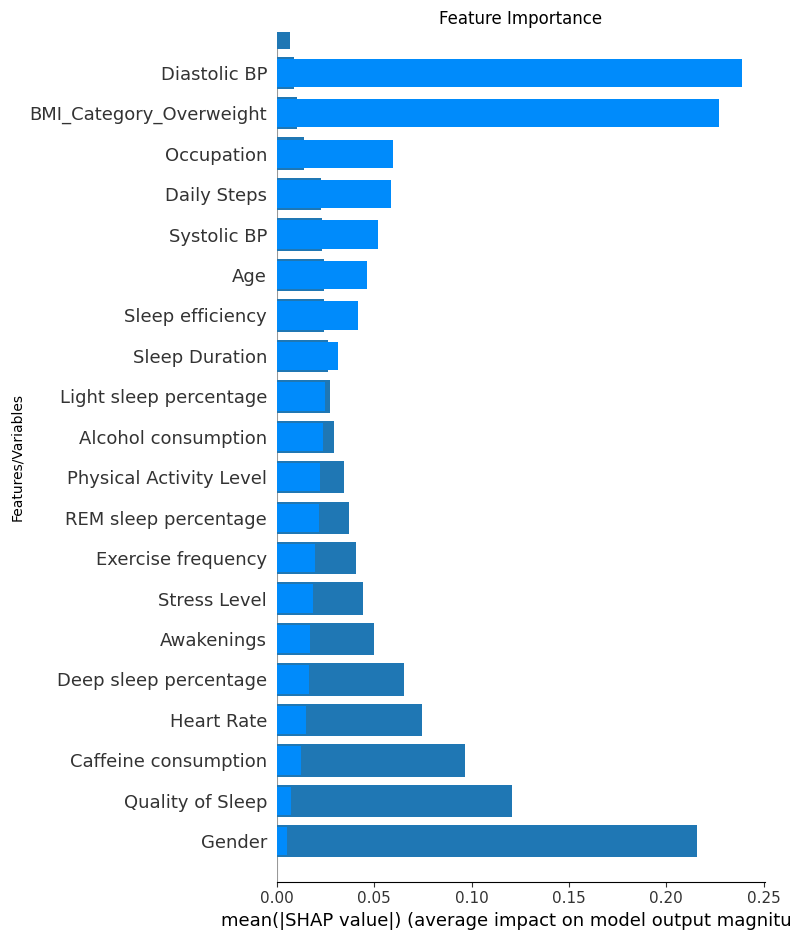

In [ ]:
import shap
target_column_name = 'Sleep Disorder'

# Separate features and target
X = filtered_df.drop(columns=[target_column_name])
y = filtered_df[target_column_name]
y_encoded = label_encoder.fit_transform(y)

# Initialize a Random Forest model
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y_encoded)

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features/Variables')
plt.title('Feature Importance')

# Use SHAP to explain individual predictions
explainer = shap.TreeExplainer(rf, X)
shap_values = explainer.shap_values(X, check_additivity=False)  # Disable additivity check


# Summary plot of SHAP values
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type='bar', show=False)
plt.show()


**RANDOM FOREST PERMUTATION IMPORTANCE**

Permutation Importance with SHAP:
                       Feature  Permutation_Importance
23                Diastolic BP                0.310295
21     BMI_Category_Overweight                0.122498
17                 Daily Steps                0.059275
0                          Age                0.034804
12              Sleep Duration                0.029846
14     Physical Activity Level                0.012679
11                  Occupation                0.008805
4        Deep sleep percentage                0.008421
5       Light sleep percentage                0.006946
13            Quality of Sleep                0.006117
10          Exercise frequency                0.005291
2             Sleep efficiency                0.003331
19  BMI_Category_Normal Weight                0.000802
20          BMI_Category_Obese                0.000434
9               Smoking status               -0.000366
18         BMI_Category_Normal               -0.000651
8          Alcohol consumption 

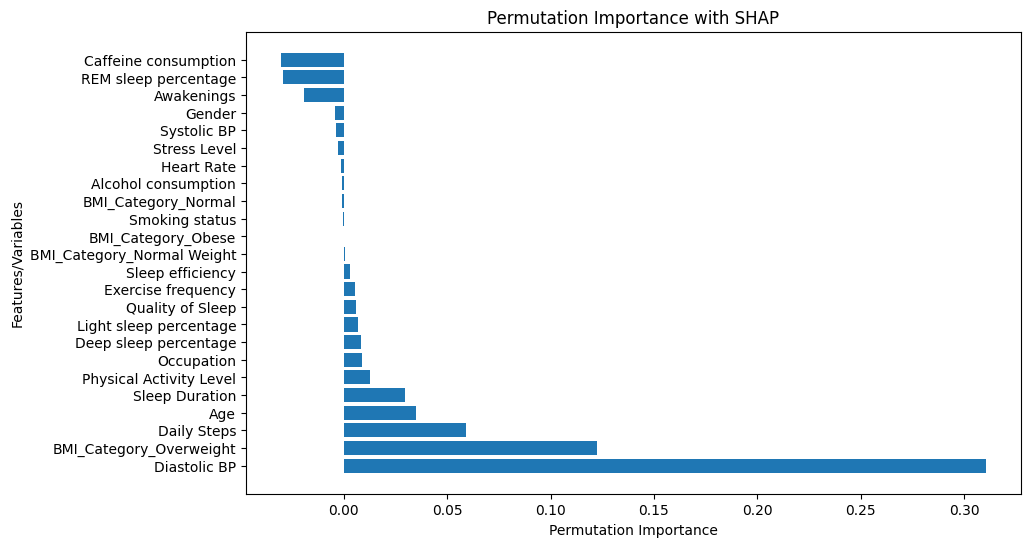

In [ ]:
import shap
from sklearn.inspection import permutation_importance

# Create a label encoder
label_encoder = LabelEncoder()

# Assuming you have a target variable 'Target_Column_Name' in your encoded_df
target_column_name = 'Sleep Disorder'

# Separate features and target
X = filtered_df.drop(columns=[target_column_name])  # Features (all columns except the target)
y = filtered_df[target_column_name]  # Target variable
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize a Random Forest model
rf = RandomForestRegressor()  # Change to RandomForestClassifier for classification

# Fit the model to your data
rf.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Calculate permutation importance with SHAP
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Create a DataFrame to store feature names and their permutation importances
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Permutation_Importance': perm_importance.importances_mean})

# Sort features by permutation importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Permutation_Importance', ascending=False)

# Print or visualize the permutation importances
print("Permutation Importance with SHAP:")
print(perm_importance_df)

# Optionally, you can plot the permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Permutation_Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Features/Variables')
plt.title('Permutation Importance with SHAP')
plt.show()


**BEESWARN CHART WITH SHAM VALUES**

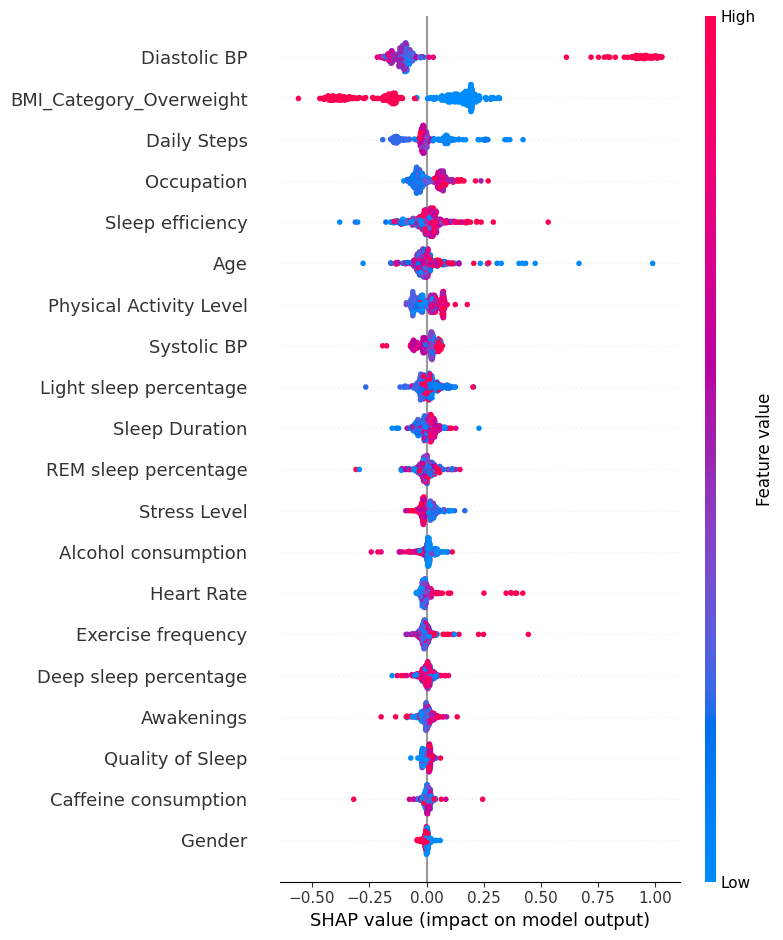

In [ ]:
target_column_name = 'Sleep Disorder'

# Separate features and target
X = filtered_df.drop(columns=[target_column_name])  # Features (all columns except the target)
y = filtered_df[target_column_name]  # Target variable
y_encoded = label_encoder.fit_transform(y)

# Initialize a Random Forest model (you can replace this with your own trained model)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf.fit(X, y_encoded)

# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(rf, X)

# Calculate SHAP values for all data points
shap_values = explainer.shap_values(X, check_additivity=False)  # Disable additivity check

# Beeswarm plot of SHAP values
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type='dot')
plt.show()


**CORRELATION MATRIX AND FEATURE CORRELATION BAR CHART**

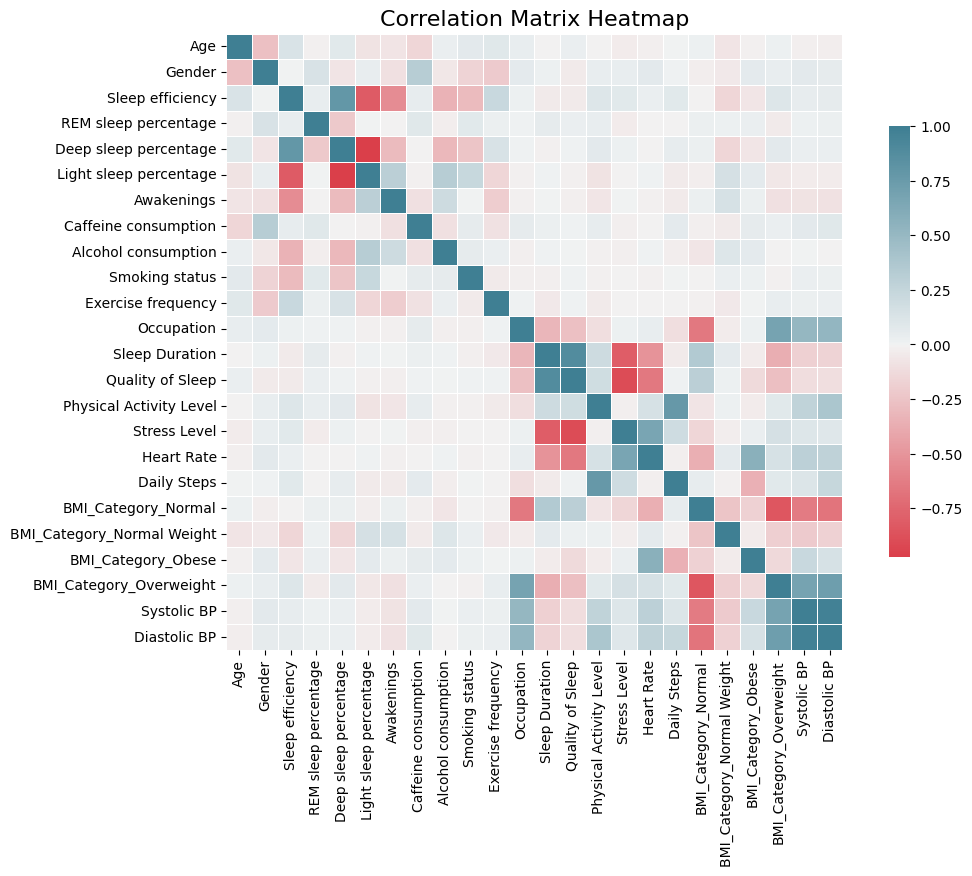

In [ ]:
target_column_name = 'Sleep Disorder'

# Separate features and target
X = filtered_df.drop(columns=[target_column_name])  # Features (all columns except the target)
y = filtered_df[target_column_name]  # Target variable

# Calculate the correlation matrix for the features
correlation_matrix = X.corr()

# Set up the custom color palette for the heatmap
custom_cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Create a heatmap with customizations (without annotation)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap=custom_cmap, center=0, square=True, linewidths=0.5, cbar=True, cbar_kws={"shrink": 0.7})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


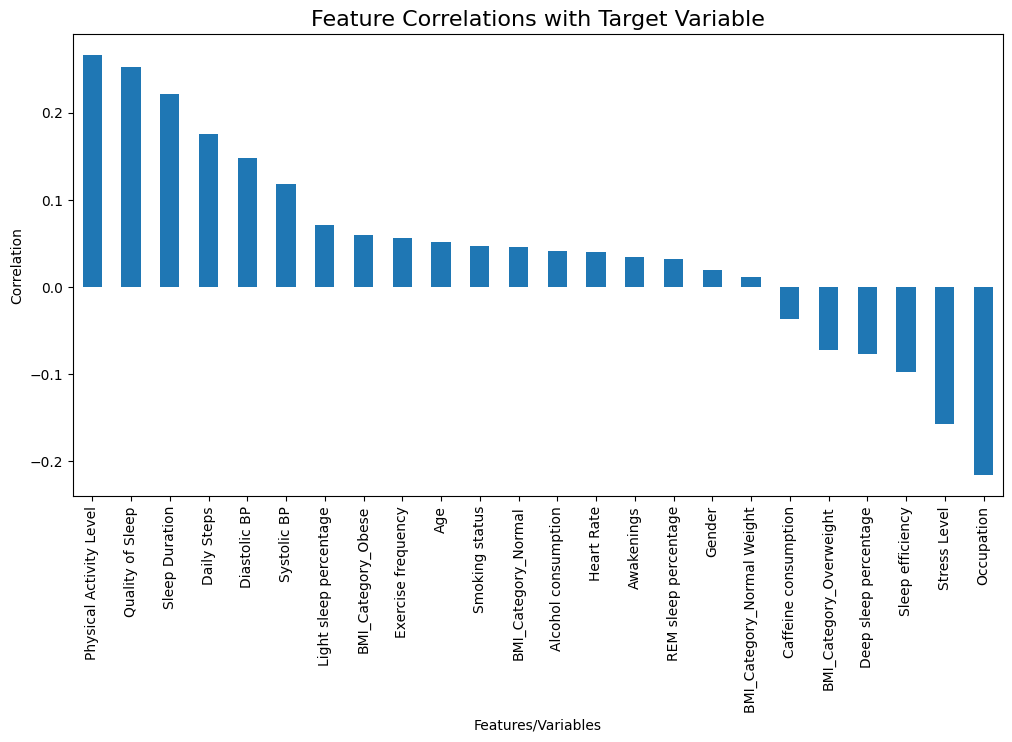

In [ ]:
target_column_name = 'Sleep Disorder'

# Separate features and target
X = filtered_df.drop(columns=[target_column_name])  # Features (all columns except the target)
y = filtered_df[target_column_name]  # Target variable
y_encoded = label_encoder.fit_transform(y)

# Calculate the correlation of each feature with the target variable
correlations = X.apply(lambda x: x.corr(pd.Series(y_encoded)))

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)
# Calculate the absolute correlations
abs_correlations = correlations.abs()

# Create a bar chart for feature correlations with the target variable
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target Variable', fontsize=16)
plt.xlabel('Features/Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Print the correlations
print("Correlation of Features with Target Variable:")
print(correlations)
print(abs_correlations) #Printing Absolute Values

Correlation of Features with Target Variable:
Physical Activity Level       0.266067
Quality of Sleep              0.251878
Sleep Duration                0.221212
Daily Steps                   0.175778
Diastolic BP                  0.148265
Systolic BP                   0.117702
Light sleep percentage        0.071435
BMI_Category_Obese            0.059342
Exercise frequency            0.056440
Age                           0.051803
Smoking status                0.046815
BMI_Category_Normal           0.046190
Alcohol consumption           0.041386
Heart Rate                    0.040069
Awakenings                    0.034123
REM sleep percentage          0.031978
Gender                        0.019934
BMI_Category_Normal Weight    0.011506
Caffeine consumption         -0.036537
BMI_Category_Overweight      -0.072451
Deep sleep percentage        -0.076784
Sleep efficiency             -0.096882
Stress Level                 -0.156913
Occupation                   -0.215673
dtype: float64
Phy

EVALUATION OF SELECTED VARIABLES

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Assuming 'df' is your DataFrame with 'Sleep Disorder' as the target variable
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])


In [ ]:
filtered_df.head()

,Age,Gender,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category_Normal,BMI_Category_Normal Weight,BMI_Category_Obese,BMI_Category_Overweight,Systolic BP,Diastolic BP
0,65,1,0.88,18,70,12,0,0,0,1,3,9,6.1,6,42,6,77,4200,None,0,0,0,1,126,83
1,69,0,0.66,19,28,53,3,0,3,1,3,1,6.2,6,60,8,75,10000,None,1,0,0,0,125,80
2,40,1,0.89,20,70,10,1,0,0,0,3,1,6.2,6,60,8,75,10000,None,1,0,0,0,125,80
3,40,1,0.51,23,25,52,3,50,5,1,1,6,5.9,4,30,8,85,3000,Sleep Apnea,0,0,1,0,140,90
4,57,0,0.76,27,55,18,3,0,3,0,3,6,5.9,4,30,8,85,3000,Sleep Apnea,0,0,1,0,140,90


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import time

# Select the specified features
selected_features = ['REM sleep percentage', 'Sleep Duration', 'Sleep efficiency', 'Age', 'Exercise frequency',
                     'Quality of Sleep','BMI_Category_Overweight', 'Physical Activity Level','Systolic BP','Diastolic BP']

# Create the feature matrix X and target variable y
X = filtered_df[selected_features]
y = filtered_df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model for multi-class classification
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Measure the start time for runtime calculation
start_time = time.time()

# Fit the logistic regression model to the training data
lr.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = lr.predict(X_test)

# Calculate the runtime
end_time = time.time()
runtime = end_time - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC
y_pred_proba = lr.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Use 'ovr' for multi-class AUC

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Runtime (seconds):", runtime)
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8648648648648649
ROC AUC: 0.8580362037288035
Runtime (seconds): 0.04979348182678223

Classification Report:
                  precision    recall  f1-score   support

      Cataplexy       0.00      0.00      0.00         1
       Insomnia       0.82      1.00      0.90         9
           None       0.86      0.95      0.90        20
    Sleep Apnea       1.00      0.67      0.80         6
Sleep Paralysis       0.00      0.00      0.00         1

       accuracy                           0.86        37
      macro avg       0.54      0.52      0.52        37
   weighted avg       0.83      0.86      0.84        37


Confusion Matrix:
 [[ 0  0  1  0  0]
 [ 0  9  0  0  0]
 [ 0  1 19  0  0]
 [ 0  1  1  4  0]
 [ 0  0  1  0  0]]


**Exploratory Data Analysis**

**Finding weight of the Target variable**

Encoded Sleep Disorder:
    Sleep Disorder  Sleep_Disorder_Encoded
0             None                       2
1             None                       2
2             None                       2
3      Sleep Apnea                       3
4      Sleep Apnea                       3
..             ...                     ...
369    Sleep Apnea                       3
370    Sleep Apnea                       3
371    Sleep Apnea                       3
372    Sleep Apnea                       3
373    Sleep Apnea                       3

[370 rows x 2 columns]

Class Weights:
2    0.521622
3    0.208108
1    0.205405
4    0.035135
0    0.029730
Name: Sleep_Disorder_Encoded, dtype: float64


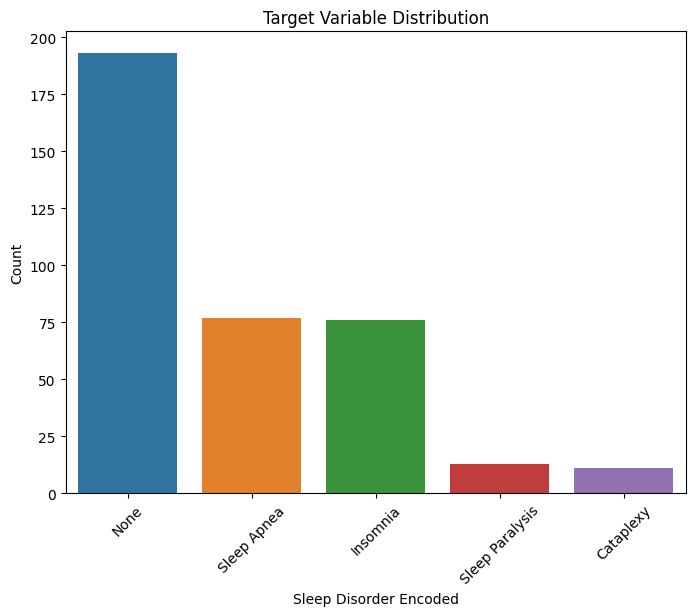

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Sleep Disorder" column
filtered_df['Sleep_Disorder_Encoded'] = label_encoder.fit_transform(filtered_df['Sleep Disorder'])

# Print the encoded values
print("Encoded Sleep Disorder:")
print(filtered_df[['Sleep Disorder', 'Sleep_Disorder_Encoded']])

# Calculate the weight of each class
class_weights = filtered_df['Sleep_Disorder_Encoded'].value_counts(normalize=True)

# Print the weight of each class
print("\nClass Weights:")
print(class_weights)

# Create a bar chart to visualize the target distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='Sleep_Disorder_Encoded', order=class_weights.index)
plt.title('Target Variable Distribution')
plt.xlabel('Sleep Disorder Encoded')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_weights.index)), labels=label_encoder.inverse_transform(class_weights.index), rotation=45)
plt.show()


In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
csv_filename = 'final dataset1.csv'
df_filled.to_csv(csv_filename, index=False)

# Download the CSV file to your local machine
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>